In [1]:
from PIL import Image
import PIL.Image
from editor.training import random_edit
from editor.ploting import display_images
from pathlib import Path

PIL.Image.MAX_IMAGE_PIXELS = None


DATA = Path('/mnt/wsl/PHYSICALDRIVE1/data/unsplash')
EDIT_COUNT = 10
TARGET_SIZE = 480, 480
originals = sorted(DATA.glob('*.jpg'))
originals_iter = iter(originals)

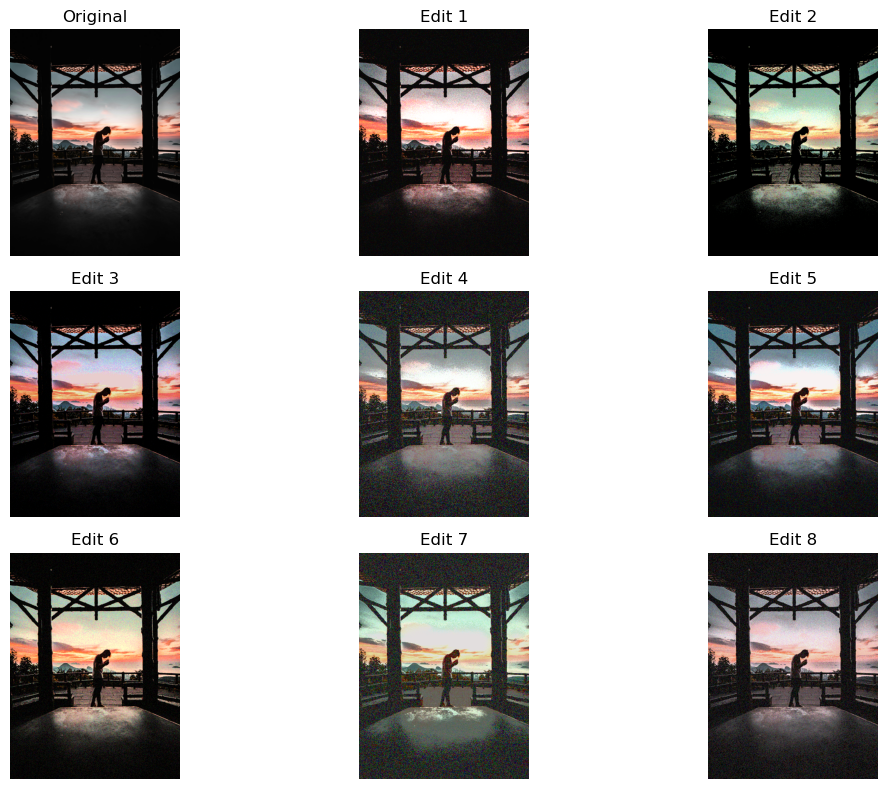

In [2]:
example = next(originals_iter)
img = Image.open(example)
img.thumbnail(TARGET_SIZE, Image.Resampling.LANCZOS)

edits = [
    random_edit(img.copy(), seed=i)
    for i in range(8)
]

images = [img] + edits
titles = ['Original'] + [f'Edit {i}' for i in range(1, len(images))]

display_images(images, titles)